# Measurement of H0 Using GW170817

### Preliminaries, Loading Modules, Etc

In [4]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [5]:

from __future__ import division

import bz2
import corner
import daft
import h5py

import scipy.integrate as si
import scipy.optimize as so
import scipy.stats as ss
import seaborn as sns


In [6]:
plt.rcParams['figure.figsize'] = [14.0, 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['figure.titlesize'] = 'medium'

In [7]:
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [ ]:
#choose psi
i = 5
psi_values = [0,0.52359878, 1.0471976, 1.5707963, 2.0943951, 2.6179939]
psi = psi_values[i]

#load the theoretical curves
name_string_th = 'Theoretical_Distance_Posterior/distance_v_0.00192190489027_psi{}corr.txt'.format(psi)
posterior_distance_th = genfromtxt(name_string_th)

#load the posterior samples, generated with lalinference
name_string_lal = 'posterior_samples_AA/posterior_samples_{}.dat'.format(i)
postskyfixed = genfromtxt(name_string_lal, names=True)
print( postskyfixed.dtype)

In [ ]:
dist_std = std(postskyfixed['distance'])

sns.distplot(postskyfixed['distance'])

xlabel(r'$d_L$ ($\mathrm{Mpc}$)')
ylabel(r'$p\left( d_L \right)$ ($\mathrm{Mpc}^{-1}$)')
legend(loc='best')
print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['distance']),dist_std))

In [ ]:
y, x, _ = plt.hist(postskyfixed['distance'], bins = 50, label = 'distance')

mu = x[numpy.argmax(y/x[1:]**2)]
print ('maximal distance (with prior) = {}'.format(x[numpy.argmax(y)]))
print ('maximal likelihood distance = {}'.format(mu))

In [ ]:
sns.distplot(postskyfixed['distance'], label = 'Posterior samples with lalinference')
plt.plot(posterior_distance_th[:,0]*mu, posterior_distance_th[:,1]/mu, label = 'Theoretical prediction')
plt.title(r'Posterior samples vs. theoretical prediction for run4, point AA, edge-on with $\psi=${:.3g}'.format(psi))
plt.xlim(mu-5*dist_std,mu+5*dist_std)
xlabel(r'$d_L$ ($\mathrm{Mpc}$)')
ylabel(r'$p\left( d_L \right)$ ($\mathrm{Mpc}^{-1}$)')
legend(loc='best')
plt.savefig('Figures/'+'distance_v_0.00192190489027_psi{}corr.png'.format(psi), dpi = 200)
print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed['distance']),std(postskyfixed['distance'])))

In [27]:
name_post_samples = ['low_spin_PhenomPNRT_posterior_samples.dat',\
                     'high_spin_PhenomPNRT_posterior_samples.dat',\
                     'posterior_samples_inj05_AA.dat' ]
name_dist = ['luminosity_distance_Mpc','luminosity_distance_Mpc','distance']

In [60]:
#choose which psoterior samples to use
index = 2

postskyfixed = genfromtxt(name_post_samples[index], names=True)

Npost_fixed = postskyfixed.shape[0]
print (Npost_fixed)

print(std(postskyfixed[name_dist[index]])/median(postskyfixed[name_dist[index]]))

12433
0.0721448059031


In [29]:
print (np.mean(postskyfixed[name_dist[index]]))
print( postskyfixed.dtype)

21.3215334117
[('theta2', '<f8'), ('logw', '<f8'), ('theta_jn', '<f8'), ('costheta_jn', '<f8'), ('redshift', '<f8'), ('v1_end_time', '<f8'), ('v1_optimal_snr', '<f8'), ('f_ref', '<f8'), ('psdscaleflag', '<f8'), ('phi_jl', '<f8'), ('l1_optimal_snr', '<f8'), ('mtotal', '<f8'), ('signalmodelflag', '<f8'), ('phi2', '<f8'), ('logl', '<f8'), ('phi1', '<f8'), ('costilt1', '<f8'), ('deltalogll1', '<f8'), ('h1_cplx_snr_arg', '<f8'), ('deltaloglh1', '<f8'), ('eta', '<f8'), ('v1h1_delay', '<f8'), ('mc_source', '<f8'), ('deltalogl', '<f8'), ('h1_cplx_snr_amp', '<f8'), ('l1v1_delay', '<f8'), ('mf_source', '<f8'), ('l1h1_delay', '<f8'), ('declination', '<f8'), ('m1', '<f8'), ('ra', '<f8'), ('h1l1_relative_phase', '<f8'), ('m2', '<f8'), ('tilt2', '<f8'), ('lal_pnorder', '<f8'), ('costilt2', '<f8'), ('iota', '<f8'), ('m2_source', '<f8'), ('rightascension', '<f8'), ('v1l1_delay', '<f8'), ('mtotal_source', '<f8'), ('psi', '<f8'), ('cosiota', '<f8'), ('l1_end_time', '<f8'), ('h1v1_relative_phase', '<f8')

### Some sanity checks of posterior distributions:

Just for a sanity check, let's plot the distance to the event:


<d> +/- sigma_d = 21.32 +/- 1.6 Mpc


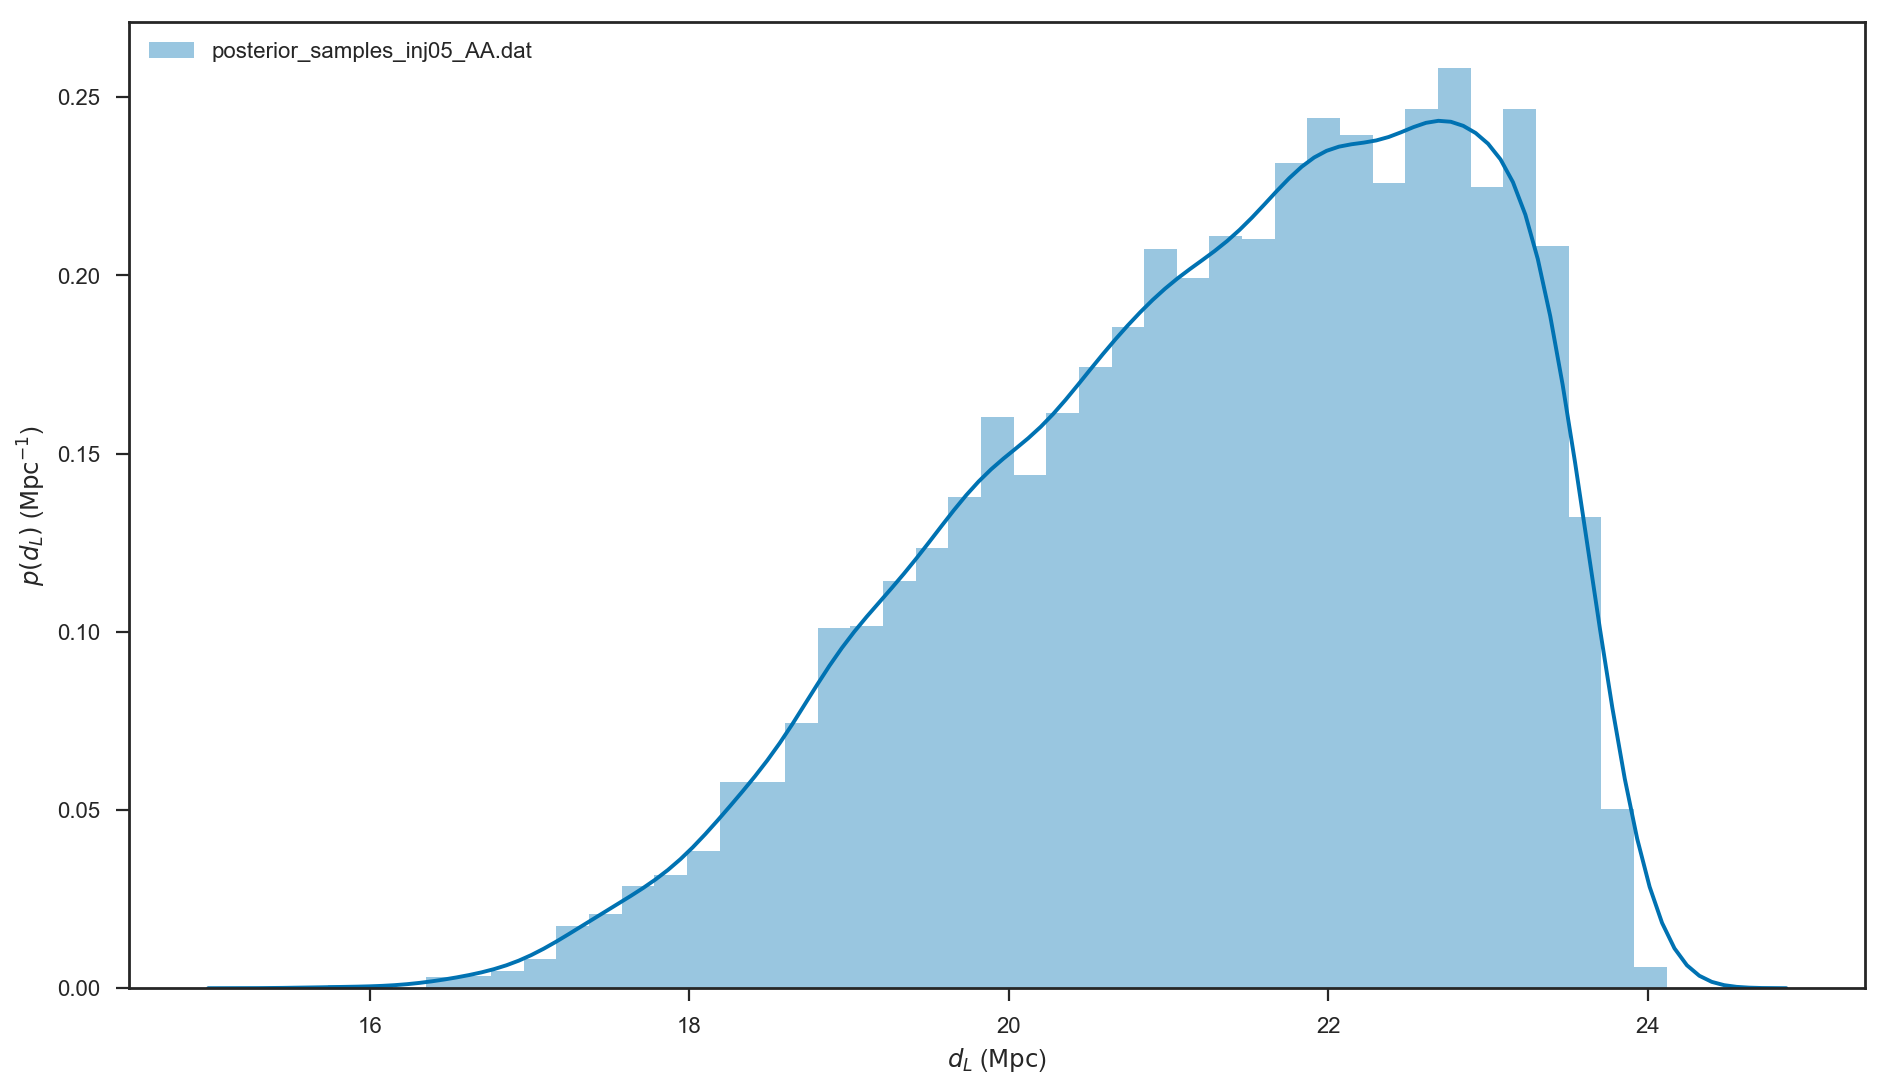

In [32]:
#for other variable name see below, otherwise skip next cell
sns.distplot(postskyfixed[name_dist[index]], label=name_post_samples[index])

xlabel(r'$d_L$ ($\mathrm{Mpc}$)')
ylabel(r'$p\left( d_L \right)$ ($\mathrm{Mpc}^{-1}$)')
legend(loc='best')
print('<d> +/- sigma_d = {:.4g} +/- {:.2g} Mpc'.format(mean(postskyfixed[name_dist[index]]),std(postskyfixed[name_dist[index]])))

maximal distance (with prior) = 22.607907574451215
maximal likelihood distance = 21.937712437406518


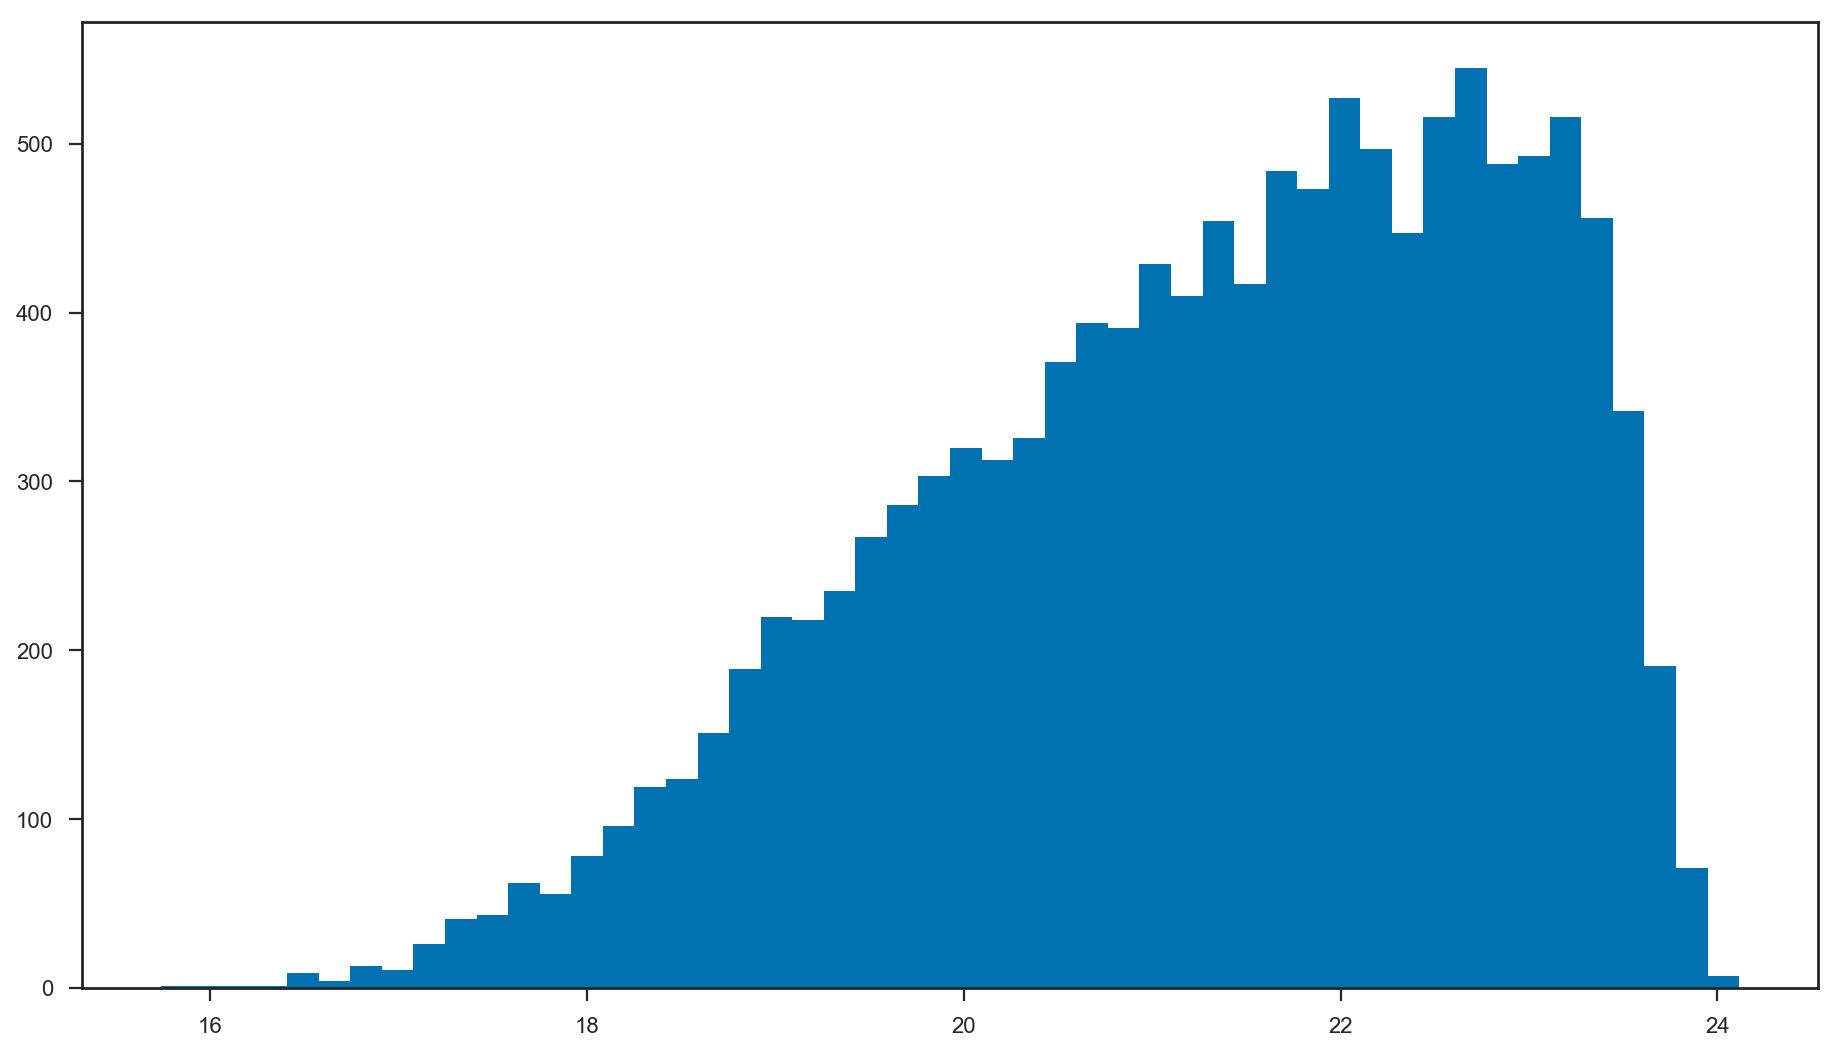

In [39]:

y, x, _ = plt.hist(postskyfixed[name_dist[index]], bins = 50, label = name_post_samples[index])

mu = x[numpy.argmax(y/x[1:]**2)]
print ('maximal distance (with prior) = {}'.format(x[numpy.argmax(y)]))
print ('maximal likelihood distance = {}'.format(mu))


In [45]:
dx = 1/mu

def plotdata(data, mu, label = ''):
    plt.plot(np.linspace(0,7*mu,len(data)),data*dx, label=label)

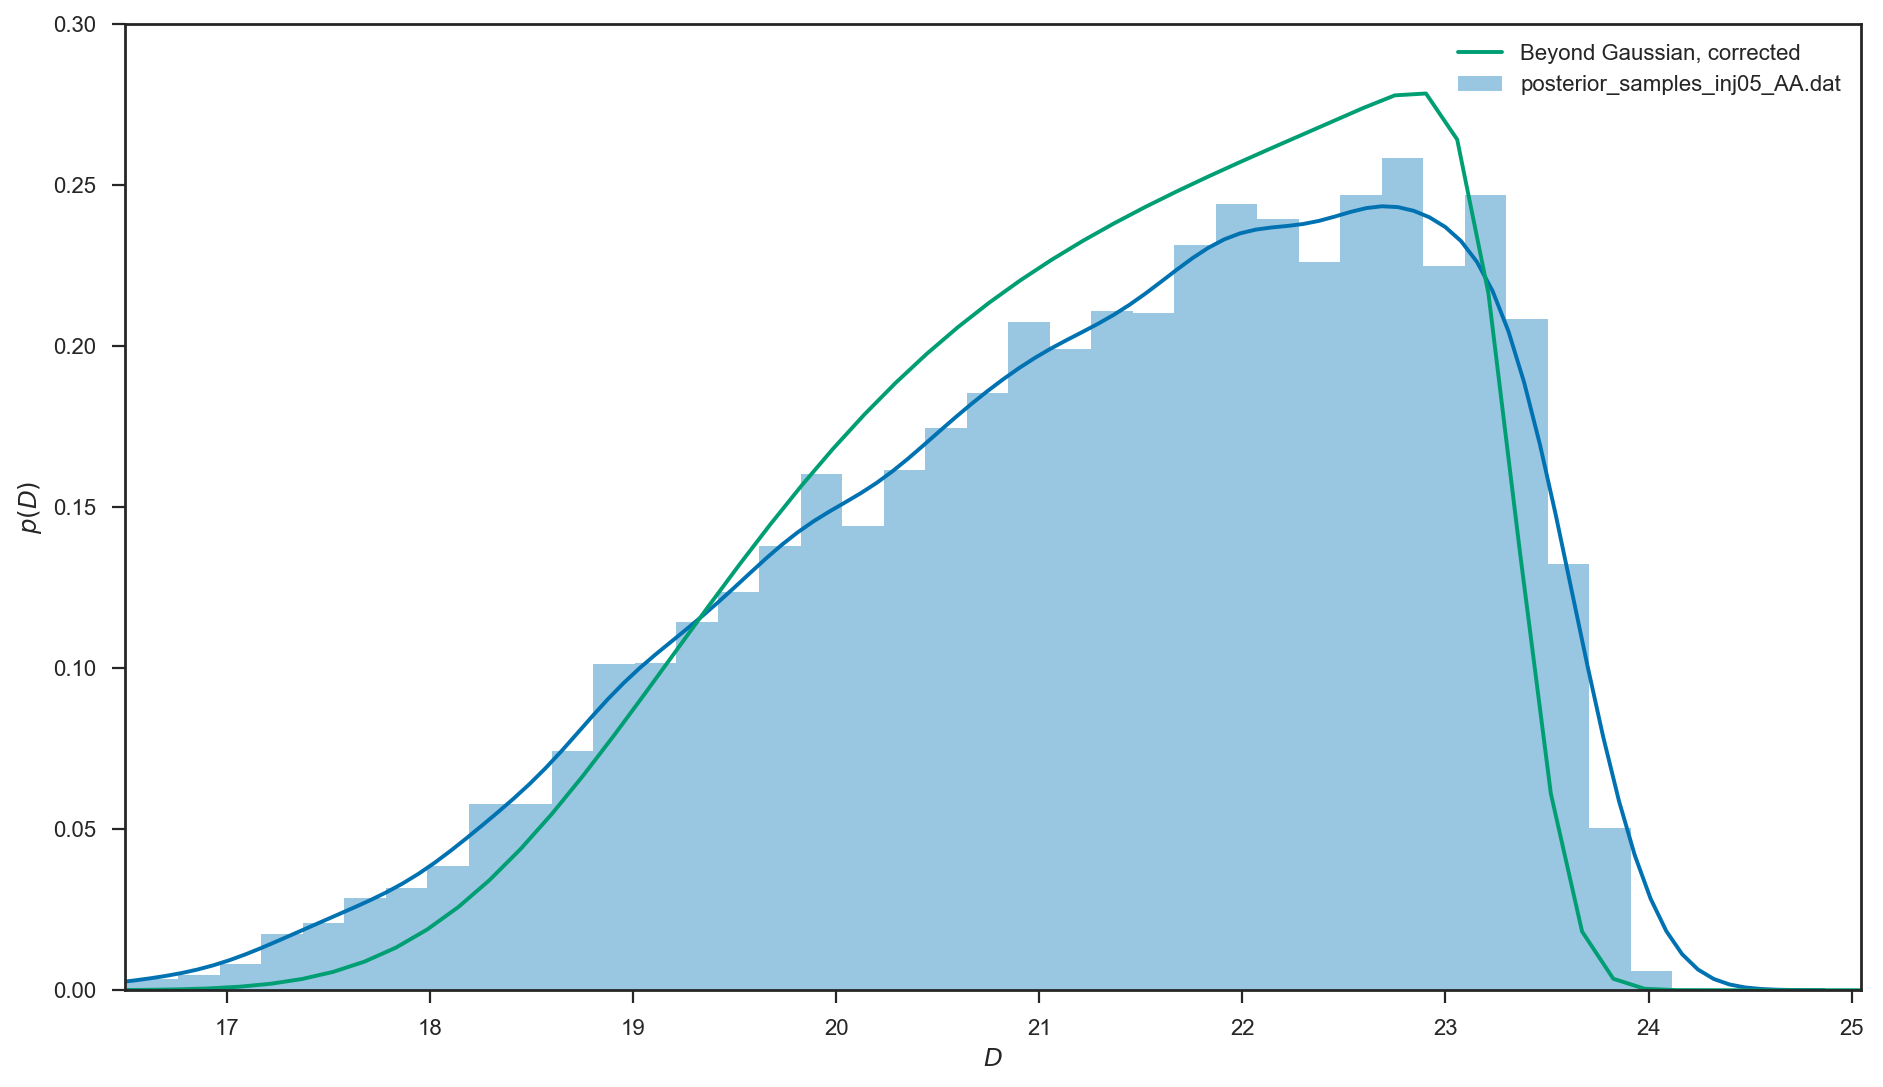

In [55]:
PDF_realeventSNR112 = np.loadtxt('PDF_realevent_SNR112_HLVt1187008582.43')    

sns.distplot(postskyfixed[name_dist[index]],norm_hist = True, label=name_post_samples[index])
plotdata(PDF_realeventSNR112,mu,'Beyond Gaussian, corrected')

xlim(mu-3.5*std(postskyfixed[name_dist[index]]),mu+2*std(postskyfixed[name_dist[index]]))
ylim(0,0.3)
xlabel(r'$D$ ')
ylabel(r'$p\left( D \right)$')
legend(loc='best')
#savefig('figures/posterior_distance_realevent_corraveragepsi.png')

In [ ]:
averagePDF = []

n_aver_psi = 30

for psi in np.linspace(0,np.pi/2,n_aver_psi):
    psi = 0.174532925199
    #load predicted curve
    inj_PDF_D_dani =  np.loadtxt('PDF/distanceposteriorPpsi{}.txt'.format(psi))
    
    averagePDF.append(inj_PDF_D_dani)

    sns.distplot(postskyfixedh['luminosity_distance_Mpc'],norm_hist = True, label='posterior samples, high spin')

    plotdata(inj_PDF_D_dani,mu_high, 'Beyond Gaussian, corrected, $\psi=${}'.format(psi))

    xlim(mu_high-30,mu_high+9.5)
    ylim(0,0.11)
    xlabel(r'$D$ ')
    ylabel(r'$p\left( D \right)$')

    legend(loc='best')
    savefig('figures/posterior_distance_realevent_corrpsi{}.png'.format(psi))
    plt.show()
    
    
    
    
averagePDF = np.array(averagePDF)/n_aver_psi   
averagePDF.reshape(np.zeros((int(len(inj_PDF_D_dani)), n_aver_psi)).shape)
averagePDF = np.sum(averagePDF, axis = 0)
    
sns.distplot(postskyfixedh['luminosity_distance_Mpc'],norm_hist = True, label='posterior samples, high spin')

plotdata(averagePDF ,mu_high, 'Beyond Gaussian, corrected, average over $\psi$'.format(psi))

xlim(mu_high-30,mu_high+9.5)
ylim(0,0.11)
xlabel(r'$D$ ')
ylabel(r'$p\left( D \right)$')

legend(loc='best')
savefig('figures/posterior_distance_realevent_corraveragepsiHIGH.png')
plt.show()

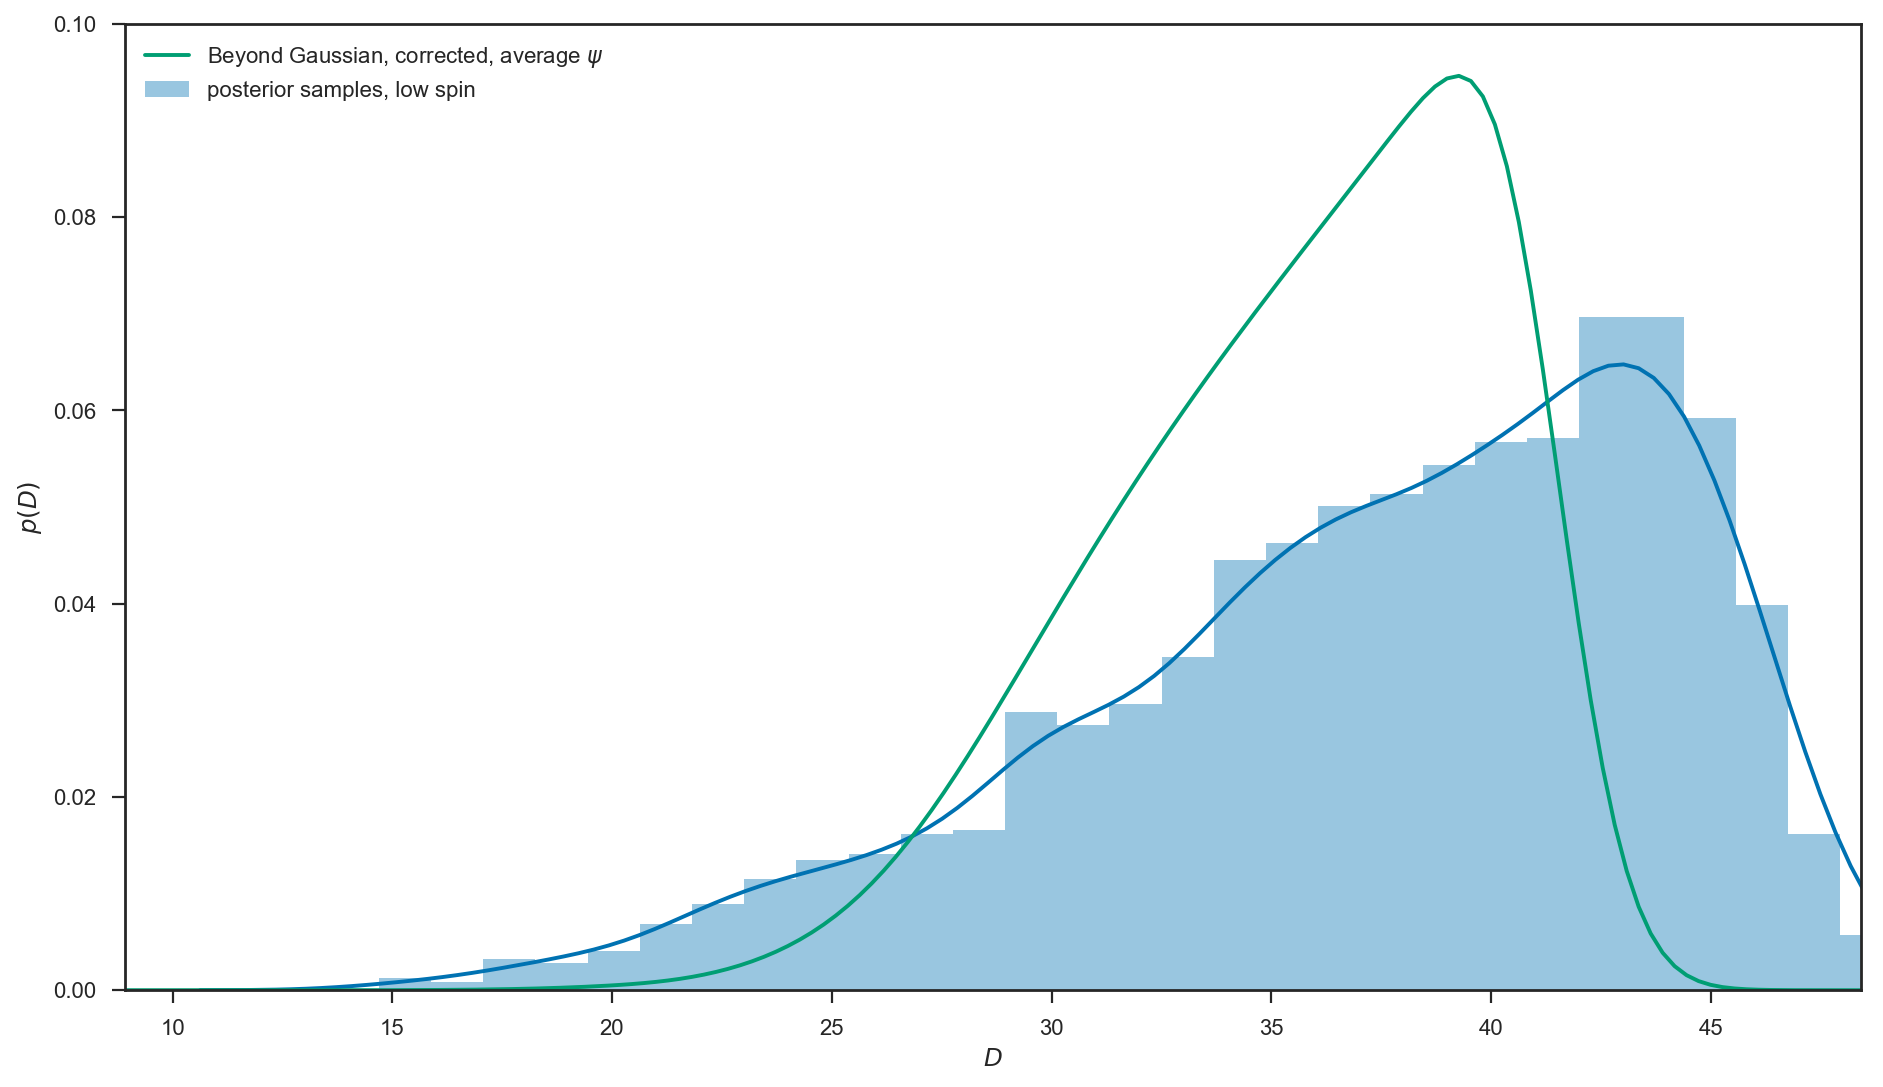

In [55]:
inj_PDF_averagepsi = np.loadtxt('PDF/realeventaveragepsi.txt')    

sns.distplot(postskyfixedl['luminosity_distance_Mpc'],norm_hist = True, label='posterior samples, low spin')

plotdata(inj_PDF_averagepsi,mu_low,'Beyond Gaussian, corrected, average $\psi$'.format(psi))

xlim(mu_low-30,mu_low+9.5)
ylim(0,0.1)
xlabel(r'$D$ ')
ylabel(r'$p\left( D \right)$')

legend(loc='best')
savefig('figures/posterior_distance_realevent_corraveragepsi.png')

How about the inclination (if we've got an EM counterpart, maybe we are face-on/face-off; though E_ISO for the GRB candidate is several orders of magnitude less that would be expected at 40 Mpc, so we may be *very* far outside the jet)?